In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [72]:
model = tf.keras.models.load_model('trained_model.keras', compile=False)


In [4]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='categorical_crossentropy',  # Change based on your task
              metrics=['accuracy'])


In [6]:
!pip install opencv-python

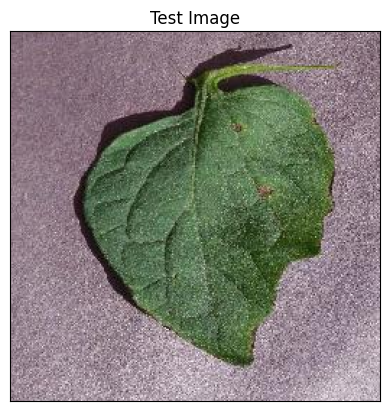

In [124]:
import cv2
image_path = 'aca.jpeg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [125]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)
predictions, predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step


(array([[1.7576985e-12, 2.7996858e-08, 2.5558233e-11, 7.2498653e-07,
         2.4777502e-12, 7.8048551e-10, 4.5243100e-15, 4.7387438e-14,
         3.5290630e-16, 6.2076097e-15, 2.2131118e-16, 1.0473445e-11,
         1.4661205e-13, 4.7821799e-15, 4.5190858e-14, 2.6897133e-14,
         2.6751115e-10, 1.1648454e-08, 1.4926936e-11, 5.7607434e-12,
         2.9228081e-15, 8.2212383e-11, 6.2739945e-11, 4.0118019e-16,
         5.0262975e-12, 2.3836824e-13, 9.1393013e-12, 1.0837245e-14,
         2.2259678e-13, 9.0758012e-06, 7.8920117e-13, 1.0788552e-10,
         4.0723085e-11, 4.9495895e-08, 9.9998927e-01, 1.8582692e-14,
         3.4971239e-07, 4.5734441e-07]], dtype=float32),
 array([[1.7576985e-12, 2.7996858e-08, 2.5558233e-11, 7.2498653e-07,
         2.4777502e-12, 7.8048551e-10, 4.5243100e-15, 4.7387438e-14,
         3.5290630e-16, 6.2076097e-15, 2.2131118e-16, 1.0473445e-11,
         1.4661205e-13, 4.7821799e-15, 4.5190858e-14, 2.6897133e-14,
         2.6751115e-10, 1.1648454e-08, 1.49269

In [126]:
result_index = np.argmax(predictions)
result_index

np.int64(34)

In [99]:
class_name = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

In [127]:
model_prediction = class_name[result_index]

In [128]:
model_prediction

'Tomato___Target_Spot'

In [51]:
import numpy as np

# Get probabilities for each class
probabilities = predictions[0]  # predictions is a 2D array, so take the first element

# Sort and display top 5 predictions (optional)
top_5_indices = np.argsort(probabilities)[-5:][::-1]  # Get indices of top 5 classes
top_5_probs = probabilities[top_5_indices]  # Get their probabilities
top_5_labels = [class_name[i] for i in top_5_indices]  # Get class names

# Print results
for label, prob in zip(top_5_labels, top_5_probs):
    print(f"{label}: {prob:.4f}")  # Show up to 4 decimal places


Corn_(maize)___Common_rust_: 0.9675
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 0.0230
Corn_(maize)___Northern_Leaf_Blight: 0.0090
Corn_(maize)___healthy: 0.0002
Tomato___Early_blight: 0.0001


In [71]:
import numpy as np
from tensorflow.keras.preprocessing import image
import tensorflow as tf


model = tf.keras.models.load_model("trained_model.keras", compile=False)  # Avoid loading optimizer

# Load class labels (Ensure you have this list)
class_labels = [
    "Apple__Apple_scab", "Apple_Black_rot", "Apple_Cedar_apple_rust", "Apple_healthy",
    "Blueberry_healthy", "Cherry(including_sour)Powdery_mildew", "Cherry(including_sour)healthy",
    "Corn(maize)Cercospora_leaf_spot Gray_leaf_spot", "Corn(maize)Common_rust",
    "Corn(maize)Northern_Leaf_Blight", "Corn(maize)healthy",
    "Grape_Black_rot", "Grape_Esca(Black_Measles)", "Grape_Leaf_blight(Isariopsis_Leaf_Spot)", "Grape_healthy",
    "Orange_Haunglongbing(Citrus_greening)", "Peach_Bacterial_spot", "Peach_healthy",
    "Pepper,_bell_Bacterial_spot", "Pepper,_bell_healthy",
    "Potato_Early_blight", "Potato_Late_blight", "Potato_healthy",
    "Raspberry_healthy", "Soybean_healthy", "Squash_Powdery_mildew",
    "Strawberry_Leaf_scorch", "Strawberry_healthy",
    "Tomato_Bacterial_spot", "Tomato_Early_blight", "Tomato_Late_blight",
    "Tomato_Leaf_Mold", "Tomato_Septoria_leaf_spot",
    "Tomato_Spider_mites Two-spotted_spider_mite", "Tomato_Target_Spot",
    "Tomato_Tomato_Yellow_Leaf_Curl_Virus", "Tomato_Tomato_mosaic_virus", "Tomato_healthy"
]

# Load and preprocess the image
img_path = "aca.jpeg"
try:
    img = image.load_img(img_path, target_size=(128, 128))  # Resize to model input
except FileNotFoundError:
    print(f"❌ Error: Image '{img_path}' not found!")
    exit()

img_array = image.img_to_array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict
predictions = model.predict(img_array)
predicted_index = np.argmax(predictions)
predicted_class = class_labels[predicted_index] if predicted_index < len(class_labels) else "Unknown"

print(f"✅ Predicted Class: {predicted_class} (Index: {predicted_index})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
✅ Predicted Class: Squash_Powdery_mildew (Index: 25)


In [64]:
print(f"Class at index 25 in your list: {class_name[25]}")


Class at index 25 in your list: Squash___Powdery_mildew


In [65]:
correct_class = ['Apple__Apple_scab', 'Apple_Black_rot', 'Apple_Cedar_apple_rust', 'Apple_healthy', 'Blueberry_healthy', 'Cherry(including_sour)Powdery_mildew', 'Cherry(including_sour)healthy', 'Corn(maize)Cercospora_leaf_spot Gray_leaf_spot', 'Corn(maize)Common_rust', 'Corn_(maize)Northern_Leaf_Blight', 'Corn(maize)healthy', 'Grape_Black_rot', 'Grape_Esca(Black_Measles)', 'Grape__Leaf_blight(Isariopsis_Leaf_Spot)', 'Grape__healthy', 'Orange_Haunglongbing(Citrus_greening)', 'Peach__Bacterial_spot', 'Peach_healthy', 'Pepper,_bell_Bacterial_spot', 'Pepper,_bell_healthy', 'Potato_Early_blight', 'Potato_Late_blight', 'Potato_healthy', 'Raspberry_healthy', 'Soybean_healthy', 'Squash_Powdery_mildew', 'Strawberry_Leaf_scorch', 'Strawberry_healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites Two-spotted_spider_mite', 'Tomato_Target_Spot', 'Tomato_Tomato_Yellow_Leaf_Curl_Virus', 'Tomato_Tomato_mosaic_virus', 'Tomato__healthy']
if class_name == correct_class:
    print("✅ Your class_name list is correct!")
else:
    print("⚠️ Your class_name list is incorrect!")

    # Find differences
    for i in range(len(correct_class)):
        if class_name[i] != correct_class[i]:
            print(f"❌ Mismatch at index {i}:")
            print(f"   ❌ Your class: {class_name[i]}")
            print(f"   ✅ Correct class: {correct_class[i]}")

⚠️ Your class_name list is incorrect!
❌ Mismatch at index 0:
   ❌ Your class: Apple___Apple_scab
   ✅ Correct class: Apple__Apple_scab
❌ Mismatch at index 1:
   ❌ Your class: Apple___Black_rot
   ✅ Correct class: Apple_Black_rot
❌ Mismatch at index 2:
   ❌ Your class: Apple___Cedar_apple_rust
   ✅ Correct class: Apple_Cedar_apple_rust
❌ Mismatch at index 3:
   ❌ Your class: Apple___healthy
   ✅ Correct class: Apple_healthy
❌ Mismatch at index 4:
   ❌ Your class: Blueberry___healthy
   ✅ Correct class: Blueberry_healthy
❌ Mismatch at index 5:
   ❌ Your class: Cherry_(including_sour)___Powdery_mildew
   ✅ Correct class: Cherry(including_sour)Powdery_mildew
❌ Mismatch at index 6:
   ❌ Your class: Cherry_(including_sour)___healthy
   ✅ Correct class: Cherry(including_sour)healthy
❌ Mismatch at index 7:
   ❌ Your class: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
   ✅ Correct class: Corn(maize)Cercospora_leaf_spot Gray_leaf_spot
❌ Mismatch at index 8:
   ❌ Your class: Corn_(maize)___